In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
train2 = pd.read_csv("train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
from sklearn import preprocessing
encoder = preprocessing.OrdinalEncoder()

# train['Gender'].fillna("Female", inplace = True)
# train['Married'].fillna("No", inplace = True)
# train['Dependents'].fillna("2", inplace = True)
# train['Education'].fillna("Graduate", inplace = True)
# train['Self_Employed'].fillna("No", inplace = True)

train = train.dropna(axis=0)



train[["Gender", "Married", "Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"]] = encoder.fit_transform(train[["Gender", "Married", "Dependents", 
                                                                                                                                       "Education", "Self_Employed", "Property_Area", "Loan_Status"]])
print(train)


      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1    LP001003     1.0      1.0         1.0        0.0            0.0   
2    LP001005     1.0      1.0         0.0        0.0            1.0   
3    LP001006     1.0      1.0         0.0        1.0            0.0   
4    LP001008     1.0      0.0         0.0        0.0            0.0   
5    LP001011     1.0      1.0         2.0        0.0            1.0   
..        ...     ...      ...         ...        ...            ...   
609  LP002978     0.0      0.0         0.0        0.0            0.0   
610  LP002979     1.0      1.0         3.0        0.0            0.0   
611  LP002983     1.0      1.0         1.0        0.0            0.0   
612  LP002984     1.0      1.0         2.0        0.0            0.0   
613  LP002990     0.0      0.0         0.0        0.0            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

In [16]:
loan_status = train["Loan_Status"].copy()
current_df = train.copy()
del current_df["Loan_ID"]

current_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,N
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,Y
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,Y
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,Y
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,Y
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,Y
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,Y


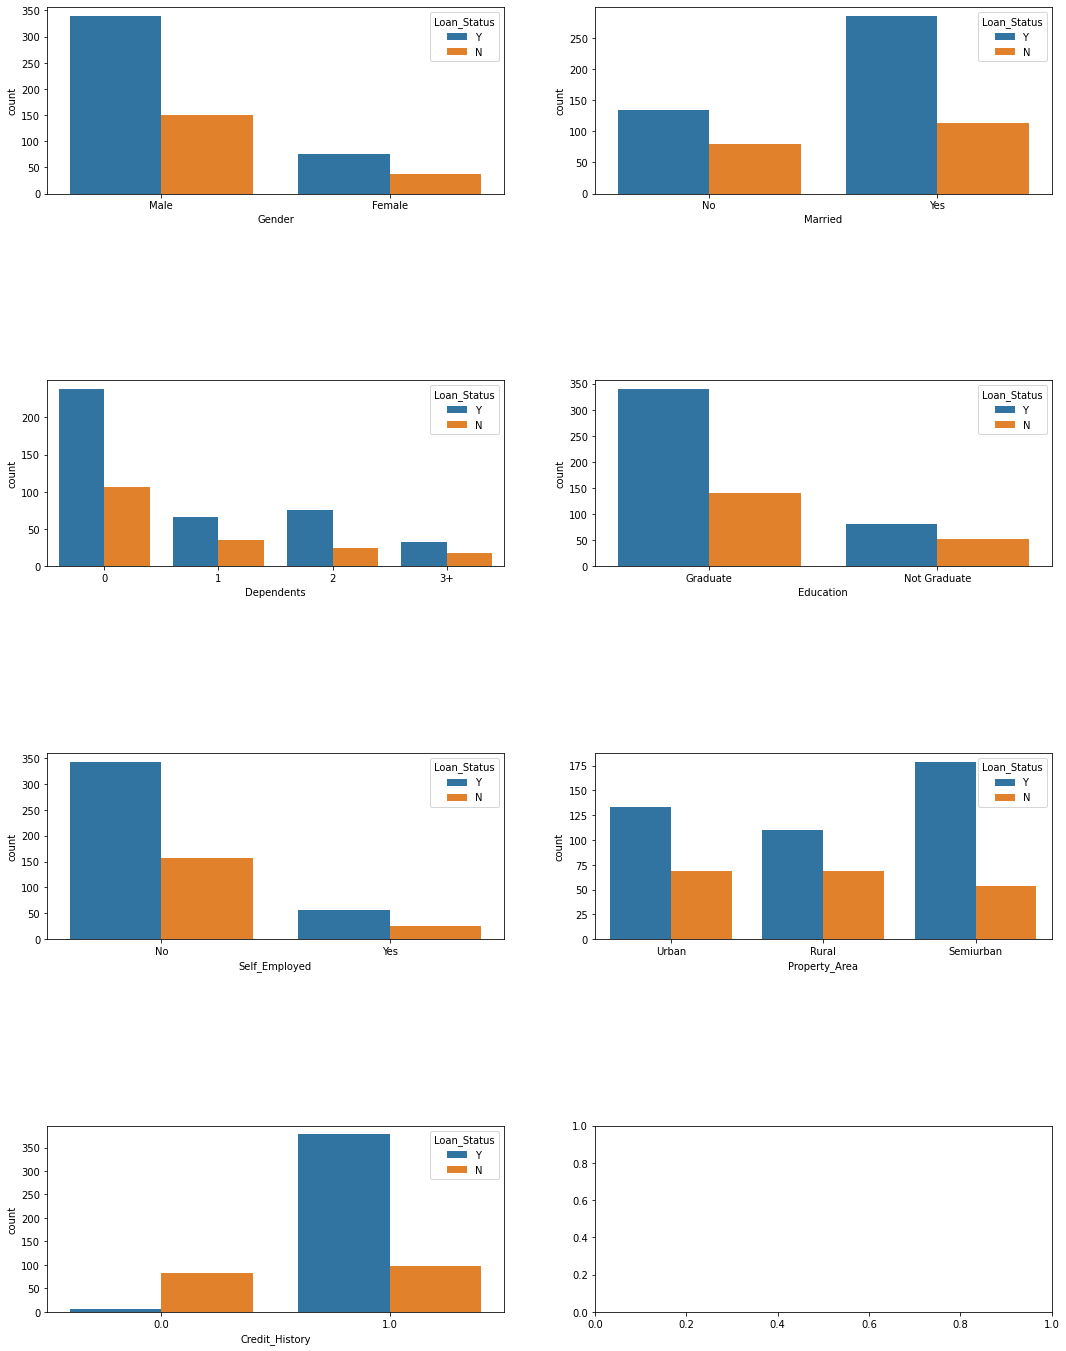

In [32]:
train3 = train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Credit_History"]]

fig,axes = plt.subplots(4,2,figsize=(18,24))
for idx,cat_col in enumerate(train3):
    row,col = idx//2,idx%2
    sb.countplot(x=cat_col,data=train2,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

<AxesSubplot:>

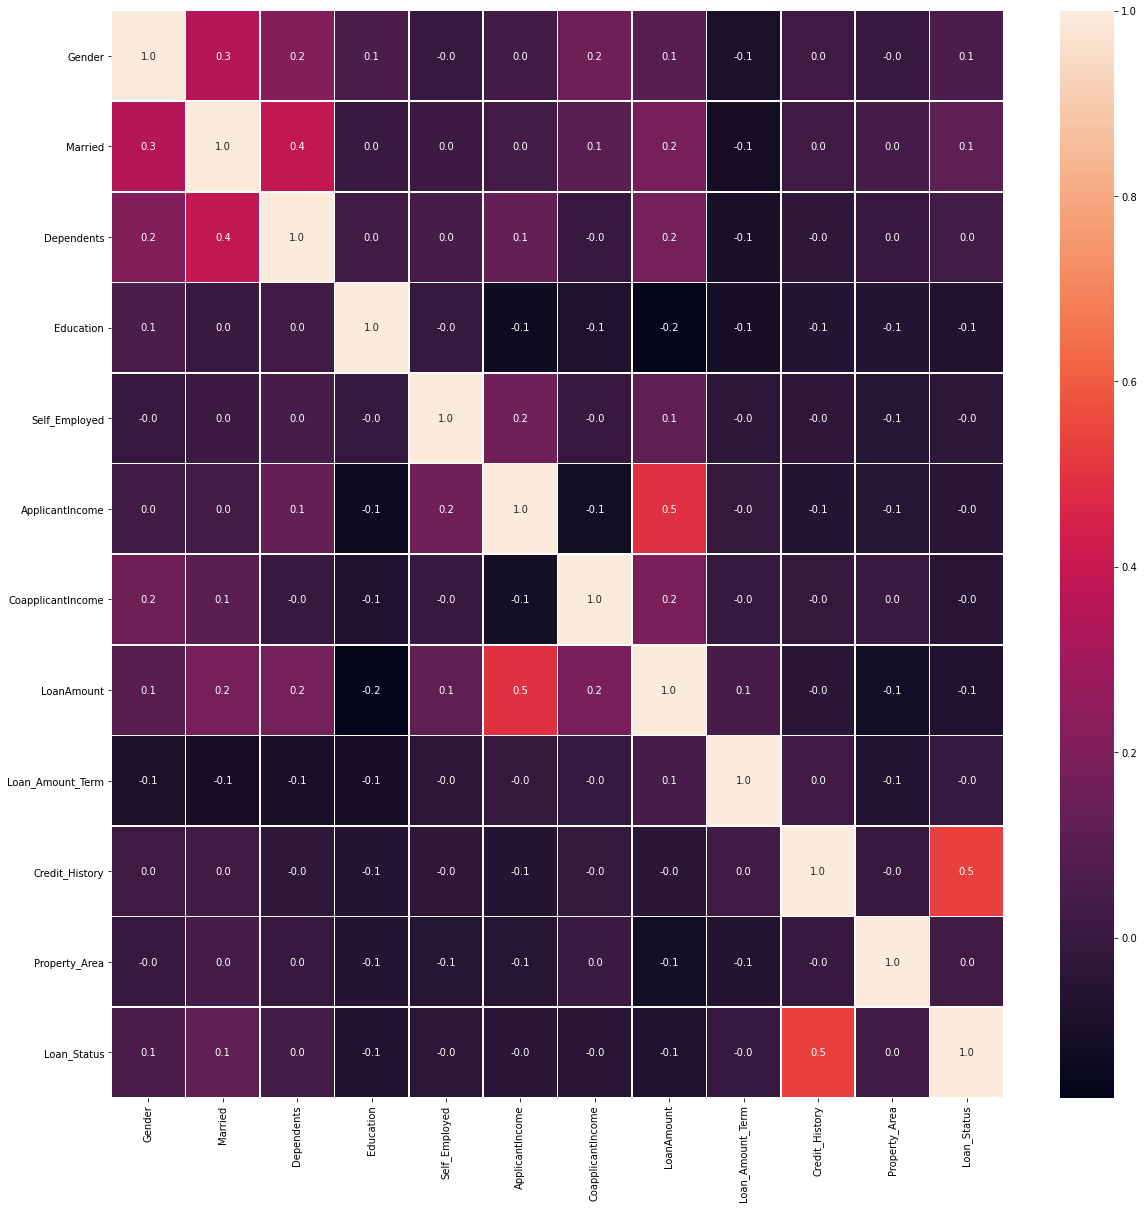

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

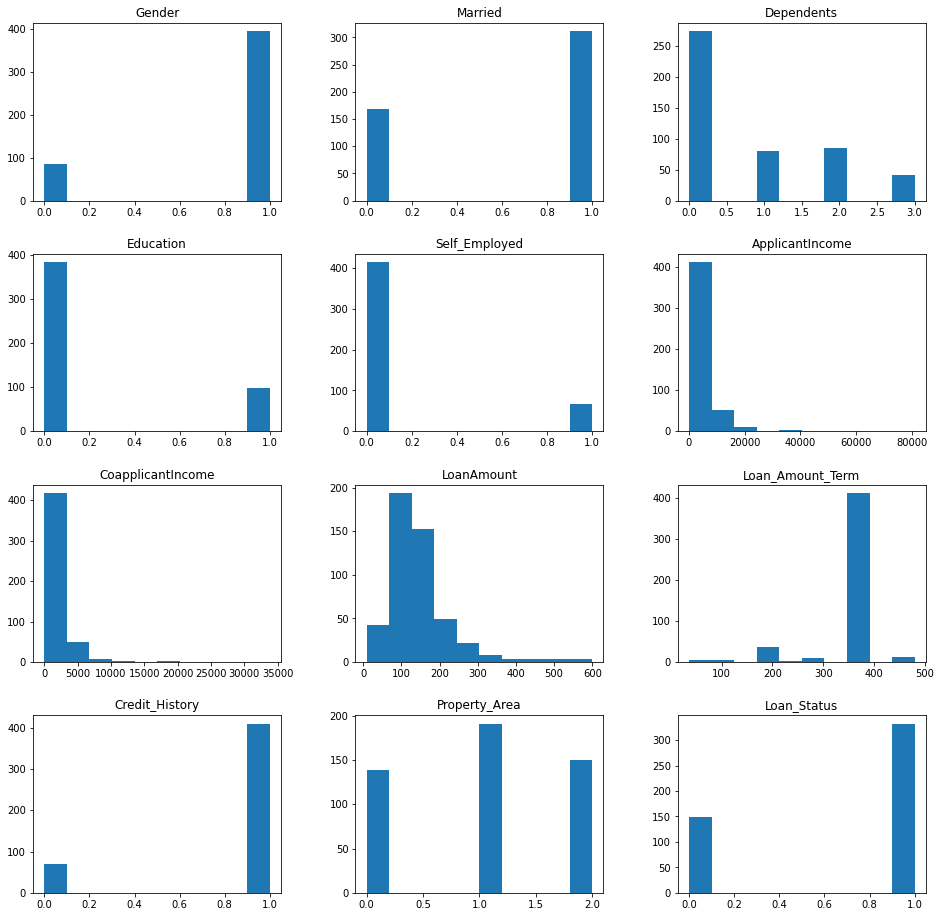

In [21]:
_ = train.hist(figsize=(16,16), grid=False)

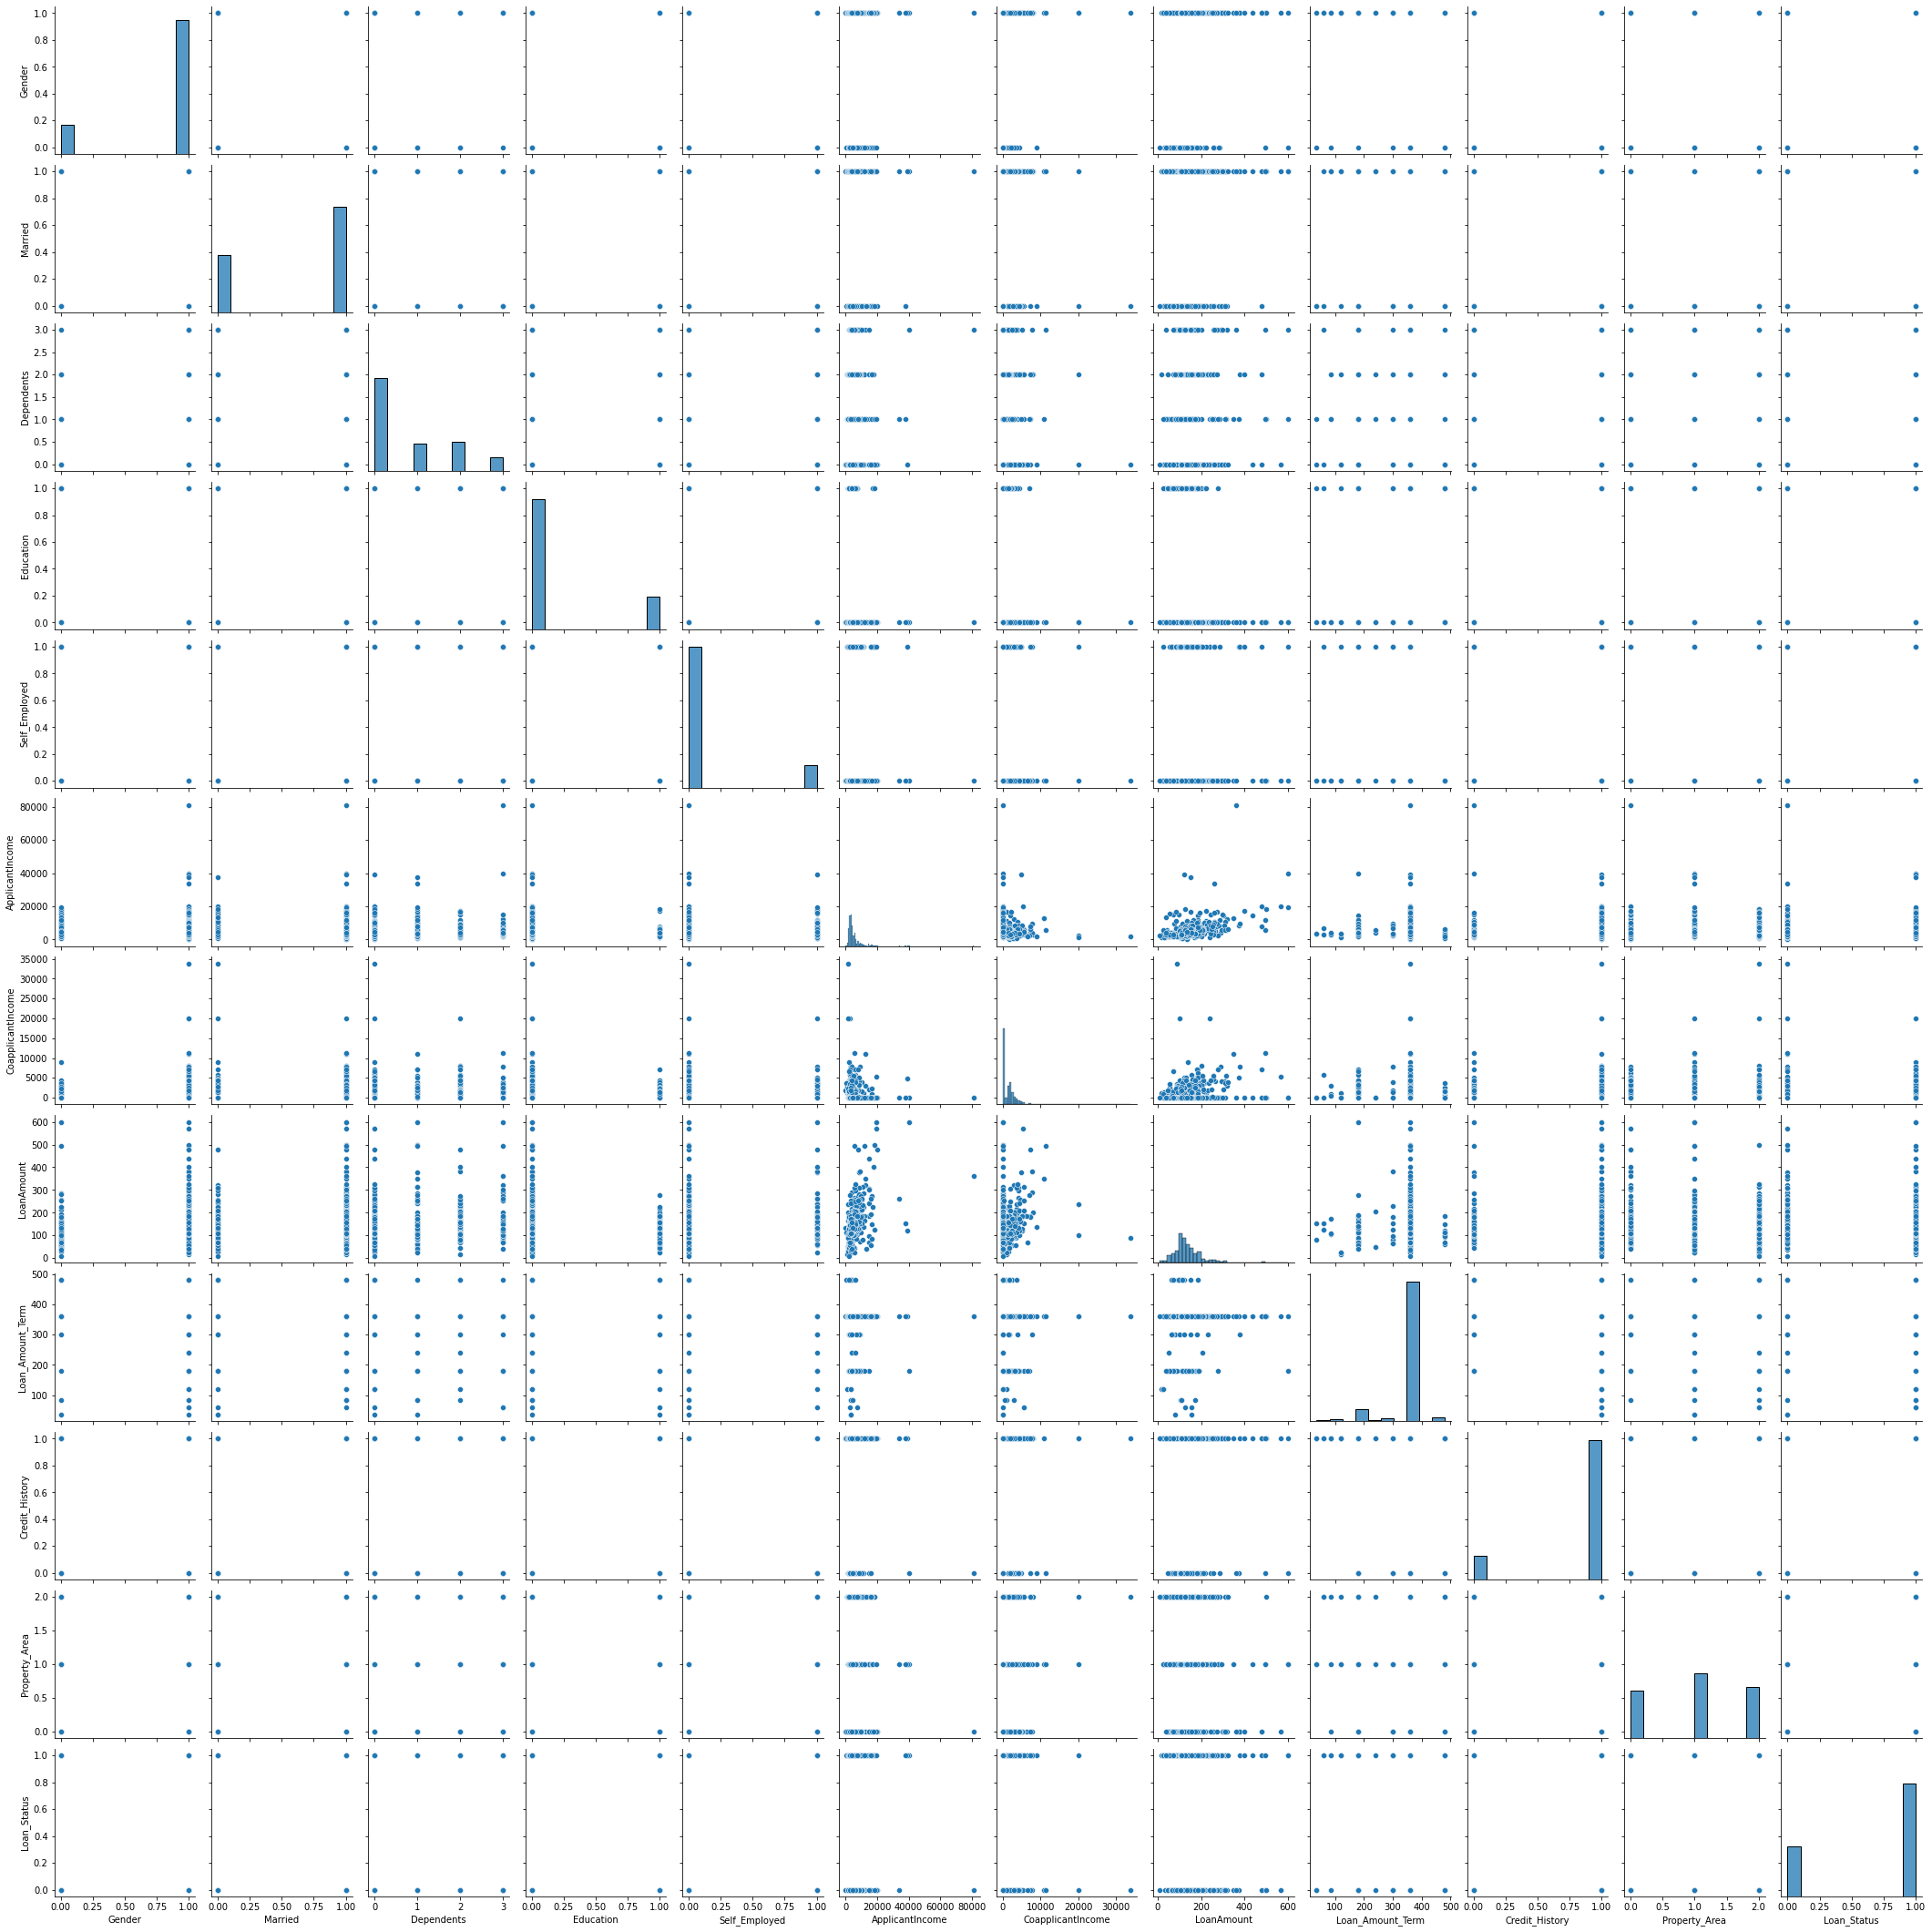

In [22]:
sb.pairplot(train)

In [14]:
# combining train and test?
# scale data before visualizations? 
# encoding for cateogrization? 

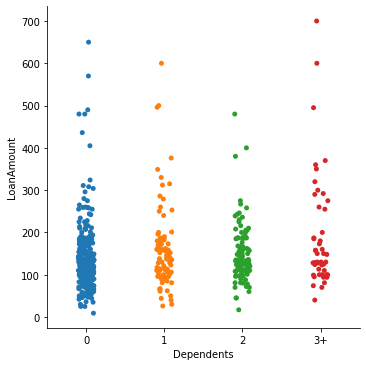

In [15]:
sb.catplot(x="Dependents", y="LoanAmount", data=train2)